# This was run locally as Google Datalab could not install h5py properly.
# This is an example of transfer learning using the InceptionV3 architecture.
## This tutorial was followed: https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11
### In this notebook, we will fit different machine learning algorithms using the features extracted from previous notebook.

In [1]:
reset -fs

In [2]:
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import dl_functions
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
sns.set_style('white')
%matplotlib inline

Using TensorFlow backend.
//anaconda/envs/wellio/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading features from pickle file.

In [3]:
X = pickle.load(open('/Users/carles/Desktop/data/tutorial/X'))

### Loading labels from pickle file.

In [4]:
y = pickle.load(open('/Users/carles/Desktop/data/tutorial/y'))

### Training, testing split.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting a SVM model.

In [6]:
clf = LinearSVC(C=0.005, loss='squared_hinge', penalty='l2', multi_class='ovr')

In [7]:
clf.fit(X_train, y_train.ravel())

LinearSVC(C=0.005, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
y_clf_pred = clf.predict(X_test)

### Not great results.

In [9]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_clf_pred)*100))

Accuracy: 49.5%


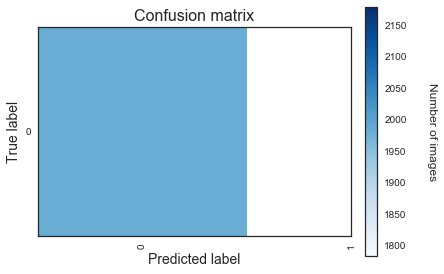

In [10]:
dl_functions.plot_confusion_matrix(y_test, y_clf_pred)

### Fitting a logistic regression model.

In [11]:
lr = LogisticRegression(C=0.005, penalty='l2')

In [12]:
lr.fit(X_train, y_train.ravel())

LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_lr_pred = lr.predict(X_test)

### Not great results.

In [14]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_lr_pred)*100))

Accuracy: 49.5%


### Fitting a random forest model, with default settings.

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
y_rf_pred = rf.predict(X_test)

### Not great results.

In [18]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_rf_pred)*100))

Accuracy: 49.5%


### Fitting a Multinomial Naive-Bayes model.

In [19]:
nb_1 = MultinomialNB()

In [20]:
nb_1.fit(X_train, y_train.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
y_nb_pred = nb_1.predict(X_test)

### Not great results.

In [22]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_nb_pred)*100))

Accuracy: 49.5%


### Fitting a Bernoulli Naive-Bayes model.

In [23]:
nb_2 = BernoulliNB()

In [24]:
nb_2.fit(X_train, y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
y_b_pred = nb_2.predict(X_test)

### Not great results.

In [26]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_b_pred)*100))

Accuracy: 50.5%


### Food images from `Imagenet`:

http://image-net.org/explore?wnid=n00021265#

### Extracting most important features from RandomForest model.

In [27]:
feature_importances_indices_rf = np.argsort(rf.feature_importances_)

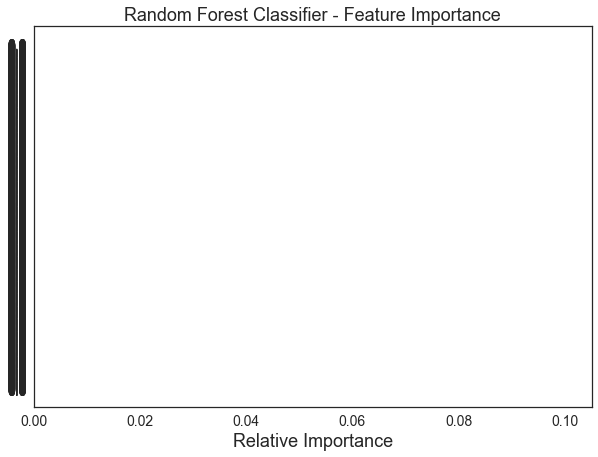

In [28]:
figure = plt.figure(figsize=(10,7))
plt.barh(np.arange(X.shape[1]), rf.feature_importances_[feature_importances_indices_rf], align="center")
plt.yticks(np.arange(X.shape[1]), X[:,-1][feature_importances_indices_rf], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Relative Importance", fontsize=18)
plt.title("Random Forest Classifier - Feature Importance", fontsize=18);

>## No feature is important. That's why the above models are not great.

>We should use deep learning to take advantage of transfer learning. 

In [29]:
labels_df = pd.DataFrame(data=y)

In [30]:
features_df = pd.DataFrame(data=X)

In [31]:
frames = [features_df, labels_df]

In [32]:
features_labels_df = pd.concat(frames, axis=1)

In [33]:
features_labels_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [34]:
features_labels_df.iloc[:,-1].head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [35]:
features_labels_df.iloc[:,0:-1].head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Making some plot of a feature space (the 1st one) vs. the target variable.

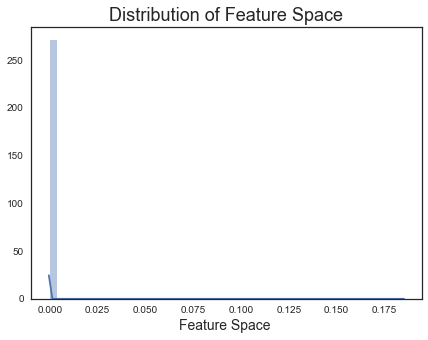

In [36]:
plt.figure(figsize=(7, 5))
sns.distplot(features_labels_df.iloc[:,0], kde=True)
plt.title('Distribution of Feature Space', fontsize=18)
plt.xlabel('Feature Space ', fontsize=14);

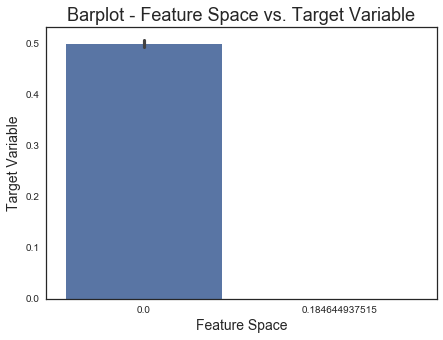

In [37]:
plt.figure(figsize=(7, 5))
sns.barplot(x=features_labels_df.iloc[:,0], y=features_labels_df.iloc[:,-1])
plt.title('Barplot - Feature Space vs. Target Variable', fontsize=18)
plt.ylabel('Target Variable', fontsize=14)
plt.xlabel('Feature Space', fontsize=14);

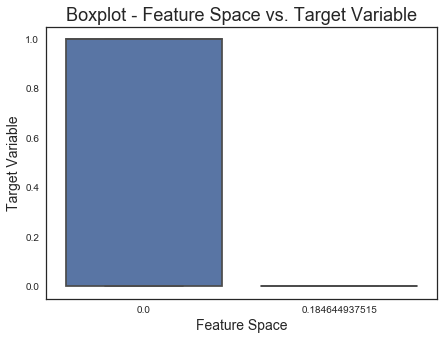

In [38]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=features_labels_df.iloc[:,0], y=features_labels_df.iloc[:,-1])
plt.title('Boxplot - Feature Space vs. Target Variable', fontsize=18)
plt.ylabel('Target Variable', fontsize=14)
plt.xlabel('Feature Space', fontsize=14);